# Assignment 2

<h2 style="color:blue"> -32566 Mahesh Shriram </h2>

### 1) Data Wrangling, II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques
to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease
the skewness and convert the distribution into a normal distribution








In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
no = 75
Students = {'roll no': np.arange(1,no+1),
            'UT 1': np.random.randint(low = 5, high = 20,size = no),
            'Insem': np.random.randint(low = 10, high = 30,size=  no),
            'UT 2': np.random.randint(low=5,high=20,size = no),
            "Endsem": np.random.randint(low = 20, high = 70, size= no)}



In [3]:
df = pd.DataFrame(Students)
df

,roll no,UT 1,Insem,UT 2,Endsem
0,1,9,15,8,27
1,2,11,16,12,48
2,3,14,18,14,68
3,4,16,16,13,51
4,5,18,29,8,31
...,...,...,...,...,...
70,71,18,28,11,51
71,72,19,23,17,29
72,73,18,28,6,23
73,74,14,26,6,47


In [4]:
df.isnull().sum()

roll no    0
UT 1       0
Insem      0
UT 2       0
Endsem     0
dtype: int64

In [5]:
outlier1 = [34,23,44]
for i in range(len(outlier1)):
    df.loc[df['roll no'] == outlier1[i], ['Insem','Endsem']] = [-50,-95]

In [6]:
outlier2 = [35,71,3]
for i in range(len(outlier2)):
    df.loc[df['roll no'] == outlier2[i], ['Insem', 'Endsem']] == [50,95]

In [7]:
df['total'] = df['Insem'] + df["Endsem"]
df

,roll no,UT 1,Insem,UT 2,Endsem,total
0,1,9,15,8,27,42
1,2,11,16,12,48,64
2,3,14,18,14,68,86
3,4,16,16,13,51,67
4,5,18,29,8,31,60
...,...,...,...,...,...,...
70,71,18,28,11,51,79
71,72,19,23,17,29,52
72,73,18,28,6,23,51
73,74,14,26,6,47,73


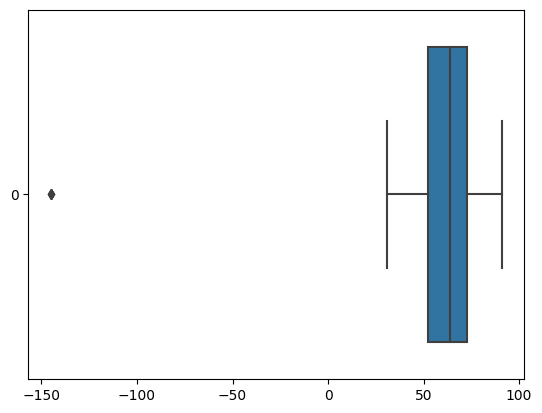

In [8]:
sns.boxplot(df["total"],orient='h')
plt.show()

In [9]:
q1 = df["total"].quantile(0.25)
q3 = df['total'].quantile(0.75)
iqr = q3-q1

In [10]:
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
upper_array = np.where(df['total']>=upper)[0]
lower_array = np.where(df['total']<= lower)[0]

print(upper_array)
print(lower_array)

[]
[22 33 43]


In [11]:
df.drop(index = lower_array,inplace= True)
print("Outliers Deleted")

Outliers Deleted


<Axes: >

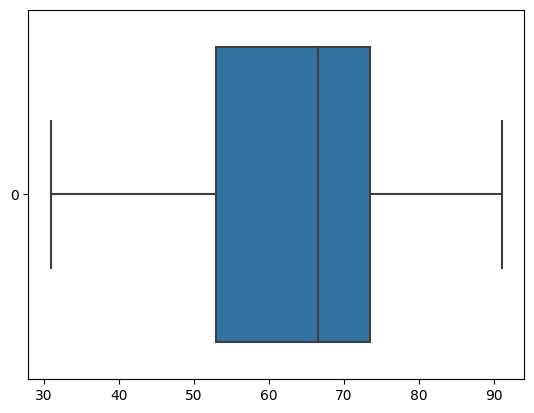

In [12]:
sns.boxplot(df['total'],orient='h')

#### Skewness

<Axes: xlabel='total', ylabel='Count'>

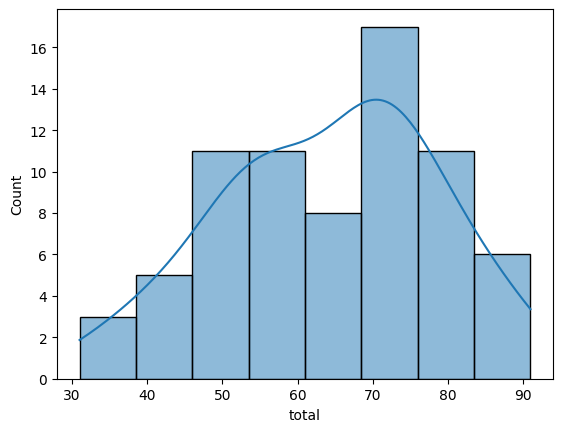

In [13]:
sns.histplot(df['total'],kde = True)

In [14]:
# Skewness measure indicates assymetric behaviour
# Skewness = 0: Then normally distributed.
# Skewness > 0: Then more weight in the left tail of the distribution.
# Skewness < 0: Then more weight in the right tail of the distribution.
from scipy import stats
original_skewness = stats.skew(df['total'], bias = True)
original_skewness

-0.2447182024783347

In [15]:
# Applying box cox
total = df['total']
transformed_data, lambda_val = stats.boxcox(total)


In [16]:
skewness_after = stats.skew(transformed_data, bias = True)
skewness_after

-0.07992834878073377

<Axes: ylabel='Count'>

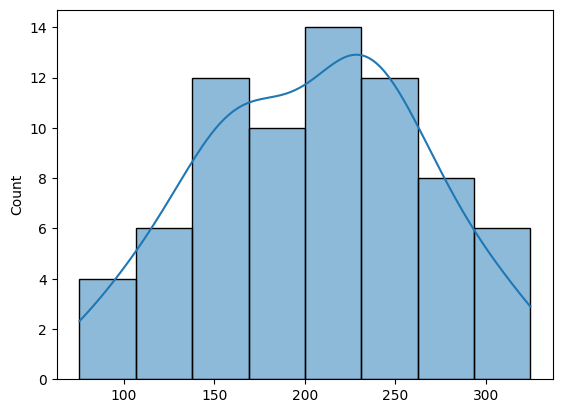

In [17]:
sns.histplot(transformed_data, kde = True)

#### Normalization

C:\Users\mahes\AppData\Local\Temp\ipykernel_3008\1270421761.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total'])


<Axes: xlabel='total', ylabel='Density'>

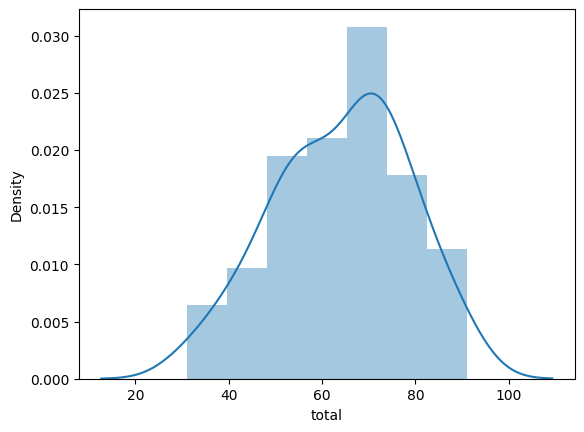

In [18]:
sns.distplot(df['total'])

In [19]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
columns = pd.DataFrame(df,columns=['total','Endsem'])
scaled_data = scaler.fit_transform(columns)
scaled_df = pd.DataFrame(scaled_data,columns= ['total','Endsem'])
scaled_df.head()


,total,Endsem
0,0.841178,0.540758
1,0.800000,0.600000
2,0.784416,0.620236
3,0.795704,0.605685
4,0.888426,0.459020


C:\Users\mahes\AppData\Local\Temp\ipykernel_3008\2978057644.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_df['total'])


<Axes: xlabel='total', ylabel='Density'>

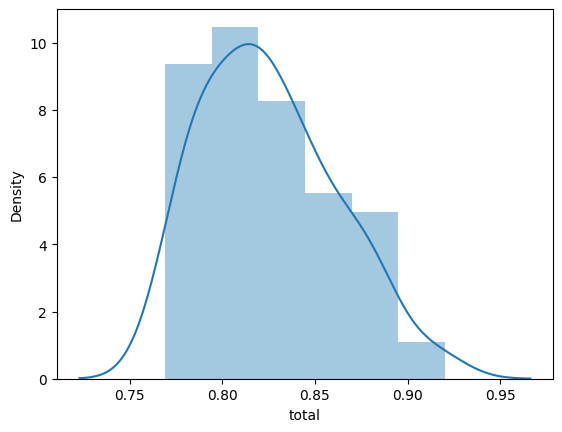

In [20]:
sns.distplot(scaled_df['total'])